# Introduction

Coronavirus or Covid-19 specifically is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The virus needs no introduction unless you've been living under a rock since the begining of 2020, but if you want to read more about it you can find more information here - [Wikipedia](https://en.wikipedia.org/wiki/Coronavirus_disease_2019), [The CDC website](https://www.cdc.gov/coronavirus/2019-ncov/index.html), [The WHO website](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/events-as-they-happen). Only trust news and updates from reliable sources because there's an absurd amount of misinformation being spread in the news and on social media.

This is an exploration of Covid-19 through data and visualizations to better understand and percieve the pandemic that has taken the world by storm

# Imports

In [1]:
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as FF

import math  
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import pycountry_convert
import calmap

from ipywidgets import interact
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotly.offline as po
po.init_notebook_mode(connected=True)

# Collect datasets

This exploration uses various datasets from the following sources -
1. [JHU CSSE GitHub](https://github.com/CSSEGISandData/COVID-19)
* [Oxford Covid-19 Government Response Tracker](https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker)
* [Our World in Data](https://ourworldindata.org/coronavirus)
* [World Development Indicators (WDI), World Bank](https://databank.worldbank.org/source/world-development-indicators)

We'll be analysing the number of confirmed cases over time alone with the number of deaths and recoveries

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_dead = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_rec = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


# df.head()

In [4]:
# df_dead.head()

In [5]:
# df_rec.head()

In [6]:
df_group = df.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
dfd_group = df_dead.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
dfr_group = df_rec.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])

In [7]:
print("Confirmed")
display(df_group.head())
print()
print("Deaths")
display(dfd_group.head())

print("Recovered")
display(dfr_group.head())

Confirmed


Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0    Afghanistan  33.0000  65.0000        0        0        0        0   
1        Albania  41.1533  20.1683        0        0        0        0   
2        Algeria  28.0339   1.6596        0        0        0        0   
3        Andorra  42.5063   1.5218        0        0        0        0   
4         Angola -11.2027  17.8739        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  4/20/20  4/21/20  4/22/20  4/23/20  \
0        0        0        0  ...     1026     1092     1176     1279   
1        0        0        0  ...      584      609      634      663   
2        0        0        0  ...     2718     2811     2910     3007   
3        0        0        0  ...      717      717      723      723   
4        0        0        0  ...       24       24       25       25   

   4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  
0     1351     1463     1531     1703     1828     1939  
1      678      712      726      736      750      766  
2     3127     3256     3382     3517     3649     3848  
3      731      738      738      743      743      743  
4       25       25       26       27       27       27  

[5 rows x 102 columns]


Deaths


Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0    Afghanistan  33.0000  65.0000        0        0        0        0   
1        Albania  41.1533  20.1683        0        0        0        0   
2        Algeria  28.0339   1.6596        0        0        0        0   
3        Andorra  42.5063   1.5218        0        0        0        0   
4         Angola -11.2027  17.8739        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  4/20/20  4/21/20  4/22/20  4/23/20  \
0        0        0        0  ...       36       36       40       42   
1        0        0        0  ...       26       26       27       27   
2        0        0        0  ...      384      392      402      407   
3        0        0        0  ...       37       37       37       37   
4        0        0        0  ...        2        2        2        2   

   4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  
0       43       47       50       57       58       60  
1       27       27       28       28       30       30  
2      415      419      425      432      437      444  
3       40       40       40       40       41       42  
4        2        2        2        2        2        2  

[5 rows x 102 columns]

Recovered


Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0    Afghanistan  33.0000  65.0000        0        0        0        0   
1        Albania  41.1533  20.1683        0        0        0        0   
2        Algeria  28.0339   1.6596        0        0        0        0   
3        Andorra  42.5063   1.5218        0        0        0        0   
4         Angola -11.2027  17.8739        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  4/20/20  4/21/20  4/22/20  4/23/20  \
0        0        0        0  ...      135      150      166      179   
1        0        0        0  ...      327      345      356      385   
2        0        0        0  ...     1099     1152     1204     1355   
3        0        0        0  ...      248      282      309      333   
4        0        0        0  ...        6        6        6        6   

   4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  
0      188      188      207      220      228      252  
1      394      403      410      422      431      455  
2     1408     1479     1508     1558     1651     1702  
3      344      344      344      385      398      423  
4        6        6        6        6        6        7  

[5 rows x 102 columns]

In [8]:
last_date = df_group.columns.values[-1]

**Take the average for each metric as the cap for the heatmap**

In [9]:
avg = math.ceil(df_group[[last_date]].mean())
avg_dead = math.ceil(dfd_group[[last_date]].mean())
avg_rec = math.ceil(dfr_group[[last_date]].mean())

# display(df_group[[last_date]].describe())

# Covid 19 cases mapped

## Global confirmed cases

In [10]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = df_group['Country/Region'],
    z = df_group[last_date],
    text = df_group['Country/Region'],
    colorscale = 'Peach',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Confirmed cases',
    zmax = avg,
    zmin = 0
))

fig.update_layout(
    title_text='Covid 19 worldwide confirmed cases',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

In [11]:
dates = df_group.columns[4:]

df_time = df_group.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')


In [12]:
df_time.head(10)

Country/Region       Lat       Long     Date  Confirmed
0          Afghanistan   33.0000    65.0000  1/23/20          0
1              Albania   41.1533    20.1683  1/23/20          0
2              Algeria   28.0339     1.6596  1/23/20          0
3              Andorra   42.5063     1.5218  1/23/20          0
4               Angola  -11.2027    17.8739  1/23/20          0
5  Antigua and Barbuda   17.0608   -61.7964  1/23/20          0
6            Argentina  -38.4161   -63.6167  1/23/20          0
7              Armenia   40.0691    45.0382  1/23/20          0
8            Australia -255.9695  1129.8623  1/23/20          0
9              Austria   47.5162    14.5501  1/23/20          0

## Increase in confirmed cases over time

In [13]:
fig = px.choropleth(df_time, locationmode = "country names",
                    locations = 'Country/Region',
                    color="Confirmed",
                    hover_name="Country/Region", 
                    color_continuous_scale='Peach',
                    range_color= [0, avg],
                    animation_frame="Date")

fig.update_layout(
    title_text='Covid 19 confirmed cases timeline',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(0,0,0)',
        countrycolor = 'rgb(0,0,0)'
    )
)


fig.show()

## Global deaths

In [14]:
dfd_time = dfd_group.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Dead')

dfd_time.head()

Country/Region      Lat     Long     Date  Dead
0    Afghanistan  33.0000  65.0000  1/23/20     0
1        Albania  41.1533  20.1683  1/23/20     0
2        Algeria  28.0339   1.6596  1/23/20     0
3        Andorra  42.5063   1.5218  1/23/20     0
4         Angola -11.2027  17.8739  1/23/20     0

In [15]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = dfd_group['Country/Region'],
    z = dfd_group[last_date],
    text = dfd_group['Country/Region'],
    colorscale = 'Reds',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Deaths',
    zmax = avg_dead,
    zmin = 0
))

fig.update_layout(
    title_text='Covid 19 worldwide deaths',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

## Global recoveries

In [16]:
dfr_time = dfr_group.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

dfr_time.head()

Country/Region      Lat     Long     Date  Recovered
0    Afghanistan  33.0000  65.0000  1/23/20          0
1        Albania  41.1533  20.1683  1/23/20          0
2        Algeria  28.0339   1.6596  1/23/20          0
3        Andorra  42.5063   1.5218  1/23/20          0
4         Angola -11.2027  17.8739  1/23/20          0

In [17]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = dfr_group['Country/Region'],
    z = dfr_group[last_date],
    text = dfr_group['Country/Region'],
    colorscale = 'Greens',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Recovered',
    zmax = avg_rec,
    zmin = 0
))

fig.update_layout(
    title_text='Covid 19 worldwide recoveries',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

# Continent Data

Split the data up by continent

In [18]:
df_country = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")


In [19]:
df_country = df_country.drop(columns=['People_Tested', 'People_Hospitalized', 'Last_Update', 'Lat', 'Long_', 'UID'])
df_country.head()

Country_Region  Confirmed  Deaths  Recovered  Active  Incident_Rate  \
0      Australia       6754      92       5717     945      26.528199   
1        Austria      15452     584      12907    1961     171.566886   
2         Canada      52865    3155      20327   29383     139.648711   
3          China      83944    4637      78493     814       5.976039   
4        Denmark       9356     452       6741    2163     161.527488   

   Mortality_Rate ISO3  
0        1.362156  AUS  
1        3.779446  AUT  
2        5.968032  CAN  
3        5.523921  CHN  
4        4.831124  DNK

In [20]:
def country_to_continent_code(country):
    try:
        return pycountry_convert.country_alpha2_to_continent_code(pycountry_convert.country_alpha3_to_country_alpha2(country))
    except :
        return 'Other'

In [21]:
code_to_continent = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'Other': 'Other'
}

In [22]:
# list(df_country['Country_Region'].apply(lambda x: country_to_continent_code(x))).count('na')
code = df_country['ISO3'].apply(lambda x: code_to_continent[country_to_continent_code(x)])
df_country[code == 'Other']


Country_Region  Confirmed  Deaths  Recovered  Active  Incident_Rate  \
60   Diamond Princess        712      13        645      54            NaN   
84           Holy See         10       0          2       8    1236.093943   
98             Kosovo        510      12         93     405      28.171099   
109        MS Zaandam          9       2          0       7            NaN   
166        Tajikistan         15       0          0      15            NaN   
169       Timor-Leste         24       0         16       8       1.820330   
182    Western Sahara          6       0          5       1       1.004470   

     Mortality_Rate ISO3  
60         1.825843  NaN  
84         0.000000  VAT  
98         2.352941  XKS  
109       22.222222  NaN  
166        0.000000  NaN  
169        0.000000  TLS  
182        0.000000  ESH

In [23]:
df_country['Continent'] = code
df_country.head()

Country_Region  Confirmed  Deaths  Recovered  Active  Incident_Rate  \
0      Australia       6754      92       5717     945      26.528199   
1        Austria      15452     584      12907    1961     171.566886   
2         Canada      52865    3155      20327   29383     139.648711   
3          China      83944    4637      78493     814       5.976039   
4        Denmark       9356     452       6741    2163     161.527488   

   Mortality_Rate ISO3      Continent  
0        1.362156  AUS      Australia  
1        3.779446  AUT         Europe  
2        5.968032  CAN  North America  
3        5.523921  CHN           Asia  
4        4.831124  DNK         Europe

In [24]:
df_country_group = df_country.groupby(['Continent']).sum().reset_index(level=['Continent'])
df_country_group['Mortality_Rate'] = 100 * df_country_group['Deaths'] / df_country_group['Confirmed']

In [25]:
df_country_group.sort_values('Confirmed', ascending=False, inplace = True)

In [26]:
df_country_group.style.background_gradient(cmap='Oranges',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Incident_Rate"])\
                        .background_gradient(cmap='Greys',subset=["Mortality_Rate"])

In [27]:
df_time['Date'] =pd.to_datetime(df_time.Date)
dfd_time['Date'] =pd.to_datetime(dfd_time.Date)
dfr_time['Date'] =pd.to_datetime(dfr_time.Date)

# Calendar Heatmap

Heatmaps of the **increase** in confirmed cases, deaths and recoveries over time

In [28]:
df_time.head()

Country/Region      Lat     Long       Date  Confirmed
0    Afghanistan  33.0000  65.0000 2020-01-23          0
1        Albania  41.1533  20.1683 2020-01-23          0
2        Algeria  28.0339   1.6596 2020-01-23          0
3        Andorra  42.5063   1.5218 2020-01-23          0
4         Angola -11.2027  17.8739 2020-01-23          0

In [29]:
df_cal = df_time.groupby('Date')['Confirmed'].sum().diff().reset_index()
df_cal = df_cal.set_index('Date')

In [30]:
dfr_cal = dfr_time.groupby('Date')['Recovered'].sum().diff().reset_index()
dfr_cal = dfr_cal.set_index('Date')

In [31]:
dfd_cal = dfd_time.groupby('Date')['Dead'].sum().diff().reset_index()
dfd_cal = dfd_cal.set_index('Date')

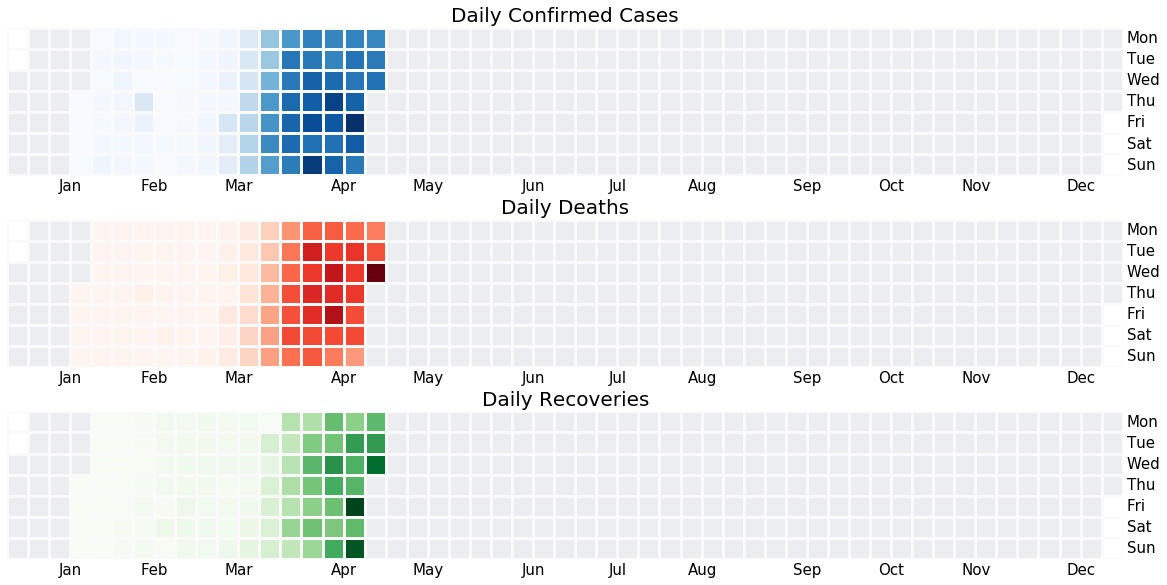

In [32]:
f = plt.figure(figsize=(20,10))
f.add_subplot(3,1,1)
calmap.yearplot(df_cal['Confirmed'], fillcolor='#ebedf0', cmap='Blues', linewidth=2,linecolor="#fafafa",year=2020,)
plt.title("Daily Confirmed Cases",fontsize=20)
plt.tick_params(labelsize=15)

f.add_subplot(3,1,2)
calmap.yearplot(dfd_cal['Dead'], fillcolor='#ebedf0', cmap='Reds', linewidth=2,linecolor="#fafafa",year=2020,)
plt.title("Daily Deaths",fontsize=20)
plt.tick_params(labelsize=15)

f.add_subplot(3,1,3)
calmap.yearplot(dfr_cal['Recovered'], fillcolor='#ebedf0', cmap='Greens', linewidth=2,linecolor="#fafafa",year=2020,)
plt.title("Daily Recoveries",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

In [33]:
all_days = pd.date_range('1/1/2020', '31/12/2020', freq='D')

In [34]:
dfc_latest = df_group[['Country/Region', 'Lat', 'Long', last_date]].rename(columns = {last_date:'Confirmed'})
dfd_latest = dfd_group[['Country/Region', 'Lat', 'Long', last_date]].rename(columns = {last_date:'Dead'})
dfr_latest = dfr_group[['Country/Region', 'Lat', 'Long', last_date]].rename(columns = {last_date:'Recovered'})

# dfd_latest

# Testing information

The number of tests carried out per country is an important metric to understand if certain countries have fewer cases simply because of a lack of extensive testing

In [35]:
testing = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv')

In [36]:
testing.head()

Entity        Date  \
0  Argentina - tests performed  2020-04-08   
1  Argentina - tests performed  2020-04-09   
2  Argentina - tests performed  2020-04-10   
3  Argentina - tests performed  2020-04-11   
4  Argentina - tests performed  2020-04-13   

                                          Source URL             Source label  \
0  https://www.argentina.gob.ar/sites/default/fil...  Government of Argentina   
1  https://www.argentina.gob.ar/sites/default/fil...  Government of Argentina   
2  https://www.argentina.gob.ar/sites/default/fil...  Government of Argentina   
3  https://www.argentina.gob.ar/sites/default/fil...  Government of Argentina   
4  https://www.argentina.gob.ar/sites/default/fil...  Government of Argentina   

  Notes  Cumulative total  Daily change in cumulative total  \
0   NaN             13330                               NaN   
1   NaN             14850                            1520.0   
2   NaN             16379                            1529.0   
3   NaN             18027                            1648.0   
4   NaN             19758                               NaN   

   Cumulative total per thousand  \
0                          0.295   
1                          0.329   
2                          0.362   
3                          0.399   
4                          0.437   

   Daily change in cumulative total per thousand  \
0                                            NaN   
1                                          0.034   
2                                          0.034   
3                                          0.036   
4                                            NaN   

   3-day rolling mean daily change  \
0                              NaN   
1                              NaN   
2                              NaN   
3                         1565.667   
4                              NaN   

   3-day rolling mean daily change per thousand  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                         0.035  
4                                           NaN

In [37]:
testing = testing[['Entity', 'Date', 'Cumulative total', 'Cumulative total per thousand']]
testing['Entity'] = testing['Entity'].apply(lambda x: x.split('-')[0].strip())

In [38]:
testing.replace('United States', 'US', inplace = True)
testing.replace('South Korea', 'Korea, South', inplace = True)
testing.replace('Myanmar', 'Burma', inplace = True)
testing.replace('Czech Republic', 'Czechia', inplace = True)
testing.replace('Taiwan', 'Taiwan*', inplace = True)

In [39]:
# set(testing['Entity'].unique())
# len(set(df_time['Country/Region'].unique()))
set(testing['Entity'].unique()) - set(df_time['Country/Region'].unique())


{'Hong Kong'}

In [40]:
testing['Date'] = pd.to_datetime(testing.Date)

In [41]:
testing = testing.rename(columns = {'Entity':'Country/Region'})

In [42]:
# testing_group = testing.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
testing = testing.drop_duplicates(subset =['Country/Region', 'Date'], 
                     keep = 'first') 

In [43]:
# country = 'US'
# l_date = testing[testing['Country/Region'] == country]['Date'].max()
# int(testing[(testing['Country/Region'] == country) & (testing['Date'] == l_date)]['Cumulative total'])
lol = []
for country in set(testing['Country/Region'].unique()):
    l_date = testing[testing['Country/Region'] == country]['Date'].max()
    total = int(testing[(testing['Country/Region'] == country) & (testing['Date'] == l_date)]['Cumulative total'])
    thousand = np.round(float(testing[(testing['Country/Region'] == country) & 
                                   (testing['Date'] == l_date)]['Cumulative total per thousand']))
    lol.append([country, total, thousand])

In [44]:
latest_test = pd.DataFrame(lol, columns = ['Country/Region', 'Cumulative total', 'Total per thousand'])
latest_test.head()

Country/Region  Cumulative total  Total per thousand
0           Iran            453386                 5.0
1         Latvia             54811                29.0
2    Netherlands            194617                11.0
3        Germany           2547052                30.0
4     Kazakhstan            232415                12.0

In [45]:
testing_group = latest_test.merge(dfc_latest[['Country/Region', 'Confirmed']], on=['Country/Region'])\
[['Country/Region', 'Cumulative total', 'Confirmed',  'Total per thousand']]

In [46]:
testing_group["Positive"] = np.round(100*testing_group["Confirmed"]/testing_group["Cumulative total"],2)

## Cumulative Total

The `Total per thousand` column tells us how many tests have been done per thousand people in the population, the higher this number, the more extensive the testing.

The Positive Column is the rate at wich people are testing positive 

In [47]:
testing_group.dropna()\
            .sort_values(['Cumulative total', 'Total per thousand', 'Positive']
                         , ascending=False).head(20)\
            .style.background_gradient(cmap='Blues',subset=["Cumulative total"])\
            .background_gradient(cmap='Greens',subset=["Total per thousand"])\
            .background_gradient(cmap='Purples',subset=["Positive"])\
            .background_gradient(cmap='Reds',subset=["Confirmed"])\

#                         .background_gradient(cmap='Greens',subset=["confirmed"])\
#                         .background_gradient(cmap='Purples',subset=["deaths"])\
#                         .background_gradient(cmap='YlOrBr',subset=["MR"])\
#                         .background_gradient(cmap='bone_r',subset=["Positive"])

## Number of tests over time

In [48]:
top_l = list(testing_group.sort_values(['Cumulative total'], ascending=False).head(15)['Country/Region'])

fig = px.line(testing[[x in top_l for x in testing['Country/Region']]].sort_values(['Country/Region', 'Date']), 
              color_discrete_sequence= px.colors.cyclical.Edge,
              x="Date", y="Cumulative total", color="Country/Region")
fig.show()

# Time series analysis

In [49]:
df_comb = dfc_latest.merge(dfd_latest, 
                           on=['Country/Region', 'Lat', 'Long']).merge(dfr_latest, 
                                                                       on=['Country/Region', 'Lat', 'Long'])
df_comb.head()

Country/Region      Lat     Long  Confirmed  Dead  Recovered
0    Afghanistan  33.0000  65.0000       1939    60        252
1        Albania  41.1533  20.1683        766    30        455
2        Algeria  28.0339   1.6596       3848   444       1702
3        Andorra  42.5063   1.5218        743    42        423
4         Angola -11.2027  17.8739         27     2          7

In [50]:
df_time_comb = df_time.merge(dfd_time, 
                             on=['Country/Region', 'Lat', 'Long', 'Date']).merge(dfr_time, 
                                                                                 on=['Country/Region', 'Lat', 'Long', 'Date'])
df_time_comb['Active'] = df_time_comb['Confirmed'] - (df_time_comb['Recovered'] + df_time_comb['Dead'])
df_time_comb.head()

Country/Region      Lat     Long       Date  Confirmed  Dead  Recovered  \
0    Afghanistan  33.0000  65.0000 2020-01-23          0     0          0   
1        Albania  41.1533  20.1683 2020-01-23          0     0          0   
2        Algeria  28.0339   1.6596 2020-01-23          0     0          0   
3        Andorra  42.5063   1.5218 2020-01-23          0     0          0   
4         Angola -11.2027  17.8739 2020-01-23          0     0          0   

   Active  
0       0  
1       0  
2       0  
3       0  
4       0

In [51]:
df_time_comb_rad = df_time_comb.drop(columns = ['Confirmed'])

In [52]:
df_total_time = df_time_comb_rad.groupby('Date')['Dead', 'Recovered', 'Active'].sum().reset_index()
df_total_time = df_total_time.melt(id_vars="Date", 
                                   value_vars=['Dead', 'Recovered', 'Active'], 
                                   var_name='Status', value_name='Total')
# df_total_time.sort_values(by = 'Date', inplace=True)

In [53]:
col_seq = ['red', 'Green', 'orange']

## Total

### Line chart

In [54]:
df_total_time.head()

Date Status  Total
0 2020-01-23   Dead     18
1 2020-01-24   Dead     26
2 2020-01-25   Dead     42
3 2020-01-26   Dead     56
4 2020-01-27   Dead     82

In [55]:
fig = px.line(df_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

### Area Plot

In [56]:
fig = px.area(df_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

## China only

In [57]:
china_time_comb = df_time_comb[df_time_comb['Country/Region'] == 'China']
china_time_comb.head()

Country/Region        Lat       Long       Date  Confirmed  Dead  \
34           China  1083.3367  3684.4197 2020-01-23        643    18   
208          China  1083.3367  3684.4197 2020-01-24        920    26   
382          China  1083.3367  3684.4197 2020-01-25       1406    42   
556          China  1083.3367  3684.4197 2020-01-26       2075    56   
730          China  1083.3367  3684.4197 2020-01-27       2877    82   

     Recovered  Active  
34          30     595  
208         36     858  
382         39    1325  
556         49    1970  
730         58    2737

In [58]:
china_time_comb_rad = china_time_comb.drop(columns = ['Confirmed'])

In [59]:
china_total_time = china_time_comb_rad.groupby('Date')['Dead', 'Recovered', 'Active'].sum().reset_index()
china_total_time = china_total_time.melt(id_vars="Date", 
                                         value_vars=['Dead', 'Recovered', 'Active'], var_name='Status', value_name='Total')
# china_total_time.sort_values(by = 'Date', inplace=True)

### Line chart

In [60]:
fig = px.line(china_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

### Area Plot

In [61]:
fig = px.area(china_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

## Rest of the world excluding China

In [62]:
others_time_comb = df_time_comb[df_time_comb['Country/Region'] != 'China']
others_time_comb.head()

Country/Region      Lat     Long       Date  Confirmed  Dead  Recovered  \
0    Afghanistan  33.0000  65.0000 2020-01-23          0     0          0   
1        Albania  41.1533  20.1683 2020-01-23          0     0          0   
2        Algeria  28.0339   1.6596 2020-01-23          0     0          0   
3        Andorra  42.5063   1.5218 2020-01-23          0     0          0   
4         Angola -11.2027  17.8739 2020-01-23          0     0          0   

   Active  
0       0  
1       0  
2       0  
3       0  
4       0

In [63]:
others_time_comb_rad = others_time_comb.drop(columns = ['Confirmed'])

In [64]:
others_total_time = others_time_comb_rad.groupby('Date')['Dead', 'Recovered', 'Active'].sum().reset_index()
others_total_time = others_total_time.melt(id_vars="Date", 
                                         value_vars=['Dead', 'Recovered', 'Active'], var_name='Status', value_name='Total')
# others_total_time.sort_values(by = 'Date', inplace=True)

### Line Chart

In [65]:
fig = px.line(others_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

### Area Plot

In [66]:
fig = px.area(others_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

# Ranking by country

In [67]:
df_country[['Country_Region', 'Confirmed', 'Active', 'Recovered', 'Deaths', 'Mortality_Rate', 'Incident_Rate']]\
                        .dropna()\
                        .sort_values(['Active', 'Confirmed', 'Recovered', 'Deaths', 'Mortality_Rate', 'Incident_Rate']
                                     , ascending=False).head(20)\
                        .style.background_gradient(cmap='Oranges',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Incident_Rate"])\
                        .background_gradient(cmap='Greys',subset=["Mortality_Rate"])

## Number of confirmed cases

In [68]:
df_comb['Active'] = df_comb['Confirmed'] - (df_comb['Dead'] - df_comb['Recovered'])

In [69]:
df_comb.head()

Country/Region      Lat     Long  Confirmed  Dead  Recovered  Active
0    Afghanistan  33.0000  65.0000       1939    60        252    2131
1        Albania  41.1533  20.1683        766    30        455    1191
2        Algeria  28.0339   1.6596       3848   444       1702    5106
3        Andorra  42.5063   1.5218        743    42        423    1124
4         Angola -11.2027  17.8739         27     2          7      32

In [70]:
fig = px.bar(df_comb.sort_values('Confirmed').tail(15), x="Confirmed", color_discrete_sequence=['orange'],
             y="Country/Region", text='Confirmed', orientation='h')
fig.show()

## Number of deaths

In [71]:
fig = px.bar(df_comb.sort_values('Dead').tail(15), x="Dead", color_discrete_sequence=['red'],
             y="Country/Region", text='Dead', orientation='h')
fig.show()

## Number of recoveries

In [72]:
fig = px.bar(df_comb.sort_values('Recovered').tail(15), x="Recovered", color_discrete_sequence=['green'],
             y="Country/Region", text='Recovered', orientation='h')
fig.show()

## Number of active cases

In [73]:
fig = px.bar(df_comb.sort_values('Active').tail(15), x="Active", color_discrete_sequence=['#D63230'],
             y="Country/Region", text='Active', orientation='h')
fig.show()

## Mortality rates

In [74]:
df_comb['Mortality'] = round((df_comb['Dead']/df_comb['Confirmed'])*100, 2)

In [75]:
fig = px.bar(df_comb.sort_values('Mortality').tail(15), x="Mortality", y="Country/Region"
             , text='Mortality', orientation='h')
fig.show()

# Oxford COVID-19 Government Response Tracker

The Oxford COVID-19 Government Response Tracker is exactly what it sounds like, a record of steps taken by governments to curb the spread of Covid-19. From the [website](https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker)-
> Governments are taking a wide range of measures in response to the COVID-19 outbreak. This tool aims to track and compare policy responses around the world, rigorously and consistently.

In [76]:
df_govres = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')

In [77]:
df_govres.head()

CountryName CountryCode      Date  C1_School closing  C1_Flag  \
0        Aruba         ABW  20200101                0.0      NaN   
1  Afghanistan         AFG  20200101                0.0      NaN   
2       Angola         AGO  20200101                0.0      NaN   
3      Albania         ALB  20200101                0.0      NaN   
4      Andorra         AND  20200101                0.0      NaN   

   C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                   0.0      NaN                      0.0      NaN   
1                   0.0      NaN                      0.0      NaN   
2                   0.0      NaN                      0.0      NaN   
3                   0.0      NaN                      0.0      NaN   
4                   0.0      NaN                      0.0      NaN   

   C4_Restrictions on gatherings  ...  H3_Contact tracing  \
0                            0.0  ...                 0.0   
1                            0.0  ...                 0.0   
2                            0.0  ...                 0.0   
3                            NaN  ...                 0.0   
4                            NaN  ...                 0.0   

   H4_Emergency investment in healthcare  H5_Investment in vaccines  \
0                                    0.0                        0.0   
1                                    0.0                        0.0   
2                                    0.0                        0.0   
3                                    0.0                        0.0   
4                                    0.0                        0.0   

   M1_Wildcard  ConfirmedCases  ConfirmedDeaths  StringencyIndex  \
0          NaN             NaN              NaN              0.0   
1          NaN             0.0              0.0              0.0   
2          NaN             NaN              NaN              0.0   
3          NaN             NaN              NaN              0.0   
4          NaN             NaN              NaN              0.0   

   StringencyIndexForDisplay  LegacyStringencyIndex  \
0                        0.0                    0.0   
1                        0.0                    0.0   
2                        0.0                    0.0   
3                        0.0                    0.0   
4                        0.0                    0.0   

   LegacyStringencyIndexForDisplay  
0                              0.0  
1                              0.0  
2                              0.0  
3                              0.0  
4                              0.0  

[5 rows x 36 columns]

In [78]:
# df_govres.info()

In [79]:
df_govres = df_govres[['CountryName', 'CountryCode', 'Date', 'StringencyIndex']].reindex()
# df_govres = df_govres[['CountryName', 'CountryCode', 'Date'
#                        , 'StringencyIndexForDisplay']].rename(columns = 
#                                                               {'StringencyIndexForDisplay':'StringencyIndex'}).reindex()

df_govres.head()

CountryName CountryCode      Date  StringencyIndex
0        Aruba         ABW  20200101              0.0
1  Afghanistan         AFG  20200101              0.0
2       Angola         AGO  20200101              0.0
3      Albania         ALB  20200101              0.0
4      Andorra         AND  20200101              0.0

In [80]:
df_govres['Date'] = pd.to_datetime(df_govres['Date'], format='%Y%m%d')

In [81]:
df_govres.tail()

CountryName CountryCode       Date  StringencyIndex
18172        Uruguay         URY 2020-04-30              NaN
18173  United States         USA 2020-04-30              NaN
18174     Uzbekistan         UZB 2020-04-30              NaN
18175      Venezuela         VEN 2020-04-30              NaN
18176   South Africa         ZAF 2020-04-30             91.4

In [82]:
df_govres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18177 entries, 0 to 18176
Data columns (total 4 columns):
CountryName        18177 non-null object
CountryCode        18177 non-null object
Date               18177 non-null datetime64[ns]
StringencyIndex    17489 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 568.2+ KB


In [83]:
len(df_govres['CountryName'].unique())

151

In [84]:
# df_govres = df_govres.ffill(axis = 0)

In [85]:
# df_govres = df_govres.dropna()

In [86]:
most_recent_date = df_govres['Date'].max()
first_date = df_govres['Date'].min()

print(first_date, most_recent_date)

2020-01-01 00:00:00 2020-04-30 00:00:00


In [87]:
dates = pd.date_range(start = first_date, end = most_recent_date)

In [88]:
countries = df_govres['CountryName'].unique()
lol = []
for country in tqdm(countries):
    for date in dates:
        res = df_govres[['CountryName','Date', 'StringencyIndex']][(df_govres['CountryName'] == country) &
                        (df_govres['Date'] == date)].values.tolist()
        if len(res) == 0:
            lol.append([country, date, np.nan])
        else:
            lol.append(res[0])

In [89]:
govres = pd.DataFrame(lol, columns = ['CountryName','Date', 'StringencyIndex']).ffill(axis = 0)
# govres = df_govres

In [90]:
govres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18271 entries, 0 to 18270
Data columns (total 3 columns):
CountryName        18271 non-null object
Date               18271 non-null datetime64[ns]
StringencyIndex    18271 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 428.4+ KB


In [91]:
govres_last= govres[govres['Date'] == most_recent_date]
govres_last.head()

CountryName       Date  StringencyIndex
120        Aruba 2020-04-30            86.24
241  Afghanistan 2020-04-30            77.52
362       Angola 2020-04-30            86.77
483      Albania 2020-04-30            88.36
604      Andorra 2020-04-30            59.12

## Stringency Index

A map showing countries colored based on the Stringency index which is a score from 0-100 that tells us how stringent the government control methods are

In [92]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = govres_last['CountryName'],
    z = govres_last['StringencyIndex'],
    text = govres_last['CountryName'],
    colorscale = 'Blues',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Response stringency %',
    zmax = 100,
    zmin = 0
))

fig.update_layout(
    title_text='Government response',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

## Government responses over time

Changes in the stringency index over time

In [93]:
govres['Date'] = govres['Date'].dt.strftime('%Y/%m/%d')

In [94]:
fig = px.choropleth(govres, locationmode = "country names",
                    locations = 'CountryName',
                    color="StringencyIndex",
                    hover_name="CountryName", 
                    color_continuous_scale='Blues',
                    range_color= [0, 100],
                    animation_frame="Date")

fig.update_layout(
    title_text='Government response to Covid 19',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(0,0,0)',
        countrycolor = 'rgb(0,0,0)'
    )
)


fig.show()